<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Research" data-toc-modified-id="Research-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Research</a></span><ul class="toc-item"><li><span><a href="#Apples" data-toc-modified-id="Apples-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Apples</a></span></li></ul></li><li><span><a href="#Identify-Variables" data-toc-modified-id="Identify-Variables-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Identify Variables</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Variable-1-:-Temperature" data-toc-modified-id="Variable-1-:-Temperature-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Variable 1 : Temperature</a></span></li><li><span><a href="#Variable-2-:-Humidity" data-toc-modified-id="Variable-2-:-Humidity-3.0.2"><span class="toc-item-num">3.0.2&nbsp;&nbsp;</span>Variable 2 : Humidity</a></span></li><li><span><a href="#Variable-3:--Oxygen-levels" data-toc-modified-id="Variable-3:--Oxygen-levels-3.0.3"><span class="toc-item-num">3.0.3&nbsp;&nbsp;</span>Variable 3:  Oxygen levels</a></span></li><li><span><a href="#Variable-4:--Pass/Fail" data-toc-modified-id="Variable-4:--Pass/Fail-3.0.4"><span class="toc-item-num">3.0.4&nbsp;&nbsp;</span>Variable 4:  Pass/Fail</a></span></li><li><span><a href="#Variable-5:--Shelf-Life" data-toc-modified-id="Variable-5:--Shelf-Life-3.0.5"><span class="toc-item-num">3.0.5&nbsp;&nbsp;</span>Variable 5:  Shelf Life</a></span></li><li><span><a href="#Variable-6:--Variety-of-apples" data-toc-modified-id="Variable-6:--Variety-of-apples-3.0.6"><span class="toc-item-num">3.0.6&nbsp;&nbsp;</span>Variable 6:  Variety of apples</a></span></li></ul></li></ul></li><li><span><a href="#Synthesise-the-dataset" data-toc-modified-id="Synthesise-the-dataset-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Synthesise the dataset</a></span><ul class="toc-item"><li><span><a href="#Import-Libriaries" data-toc-modified-id="Import-Libriaries-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Import Libriaries</a></span></li><li><span><a href="#Create-the-dataset" data-toc-modified-id="Create-the-dataset-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Create the dataset</a></span></li></ul></li><li><span><a href="#Analyse-Variables" data-toc-modified-id="Analyse-Variables-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Analyse Variables</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#References" data-toc-modified-id="References-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>References</a></span></li></ul></div>

#            2019 DA Project - Year Round Supply of Apples

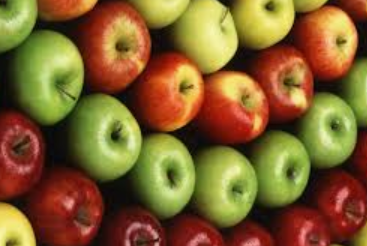

## Introduction

Apples are seasonal - they are a perishable product with a life cycle of a couple of weeks.  How is it possible that the supply of high quality apples is maintained all year?  I will research and investigate this phenomenon.  Once this research is compete, I will identify variables and synthesise a dataset using Python[1] and Numpy[5].  Git [3] software is used to track progress of this project.

## Research

### Apples

Apples are one of the most popular fruits and have extraordinary health benefits. They are a rich source of phytochemicals, and epidemiological studies have linked the consumption of apples with reduced risk of certain cancers, cardiovascular disease, asthma and diabetes. Apples are high in  antioxidants which inhibit cancer cell proliferation, decrease lipid oxidation, and lower cholesterol.[6]
 
There is an important health benefit therefore associated with availability of apples out of season. However, after apples are picked, they continue to ripen driven by a hormone called ethylene.   How does an edible product with a relatively limited lifespan have year round availability?  


95% of the €100 million worth of apples consumed in Ireland annually are imported. Even in peak apple season in Ireland, the apples on our supermarket shelves are more likely to have been grown in New Zealand, South America, China and India.[15].  The transit time from these destinations alone should render these apples inedible.  However, the consumer is repeatedly purchasing this produce without question.

**Controlled atmosphere storage rooms**

The reason that apples are available all year round is that they are stored in controlled atmosphere storage.  In the mid-20th Century, researchers began to experiment with directly manipulating the composition of the air in storage rooms. If the air is formulated so that it has very little oxygen, ethylene has less effect on fruit. In a modern controlled atmosphere (CA) storage room, air is kept cool.   Apples for CA are picked at their peak and rushed into CA storage the day they are picked.  Apples can be stored for up to 12 months and remain in good condition at a temperature between 0ºC to 5ºC, depending on the variety. In order to keep moisture loss to a minimum, apples should be stored in 90-95% atmospheric humidity. Oxygen levels should range from 1.5 to 2.5 percent by adjusting the carbon dioxide levels.[7]

The apples that come out of storage remain essentially as they were when they came off the tree but do not develop the smell that characterises the tree-ripened fruit. Consumers prefer them to over-ripe apples where the ethylene response has gone on too long. [8]  The apples are for all intents and purposes freshly picked.

Once the fruit is picked and in storage, it must be inspected before it can be sold. Once grading is complete, inspectors randomly grade a sample of apples. There will be therefore a certain quantity that will not meet standard.[15] 
Once the apples pass inpsection, they are ready to be packaged and transferred to the corners of the globe.

Apples therefore can be purchased all year round as a result of manipulating their environment i.e. effectively put in stasis.  I will simulate a dataset built on factors that impact perishability of apples.

## Identify Variables

In the research above the optimum storage conditions have been identified for apples in controlled atmosphere facilities.
These variables combined extend the life cycle of an apple after it is picked.
Variables are as follows:

Numeric:
 - Temperature 0 - 5 degrees
 - Humidity 90 - 95%
 - Oxygen level 1.5 to 2.5%
 
Categorical:
 - Pass Fail
 - Shelf life maximum 365 days
 - Variety of Apples

Likely distributions are as follows: 

#### Variable 1 : Temperature
Keeping apples cold helps slow the emission of ethylene.  Keeping apples stored between 0ºC to 5ºC is optimal. A normal distribution is appropriate with a mean of 2.5% as controlled atmosphere facilities should aim to achieve the average value with 95% of values within 2 standard deviations of the mean. 

#### Variable 2 : Humidity
Appropriate humidity levels need to be maintained otherwise apples dehydrate and shrivel. Optimal humidity should be set between 90 - 95 % with a mean is 92.5%.  A normal distribution is also appropriate as values are centered around the mean, 50% to the left and 50% to the right. Properties of normal distributions are very consistent with 68% of observations falling within the range of one standard deviation of the mean and 95% within 2 standard deviations. 

#### Variable 3:  Oxygen levels
With controlled atmosphere storage, apples are sealed in an environment with oxygen levels of approximately 2% with temperature, humidity, nitrogen and carbon dioxide are all carefully regulated. This ensures that apples are kept in stasis for up to a year.  Ambient oxygen level is in the range of 1.5 to 2.5%  A normal distribution is also appropriate with a mean of 2%.  Values are centered around the mean, 50% to the left and 50% to the right. 

#### Variable 4:  Pass/Fail
 A certain amount of apples will not be fit for consumption as they do not pass inspection at a cold storage facility.  I assume that 5% of all apples from our sample fail inspection.
 
#### Variable 5:  Shelf Life
 The shelf life of apples can be extended up to a year if the apples are stored correctly in appropriate conditions. 
 Categories:
 
 - 0-90 days.      20% of apples are assumed to fall within this range.
 - 91-180 days.    40% of apples are assumed to fall within this range.
 - 181-240 days.   20% of apples are assumed to fall within this range.
 - 240-365 days.   15% of apples are assumed to fall within this range.
 - 366+ days.       5% of apples are assumed to fall within this range.
 
 This equates to a mean of approx 169 days.
 
#### Variable 6:  Variety of apples

Generate a random sample from the below popular apple varieties:
 - granny smith - assume 25% in CA storage
 - pink lady  - assume 25% in CA storage
 - gala - assume 25% in CA storage                                                          
 - golden delicious- assume 25% in CA storage      

## Synthesise the dataset
### Import Libriaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import string
from random import choices

In [2]:
# Make matplotlib show interactive plots in the notebook.
%matplotlib inline
# Apply the default seaborn settings
sns.set()

### Create the dataset

In [3]:
# Dataset comprises 1000 apples and is called apple
apple = 1000

In [4]:
# set the seed
np.random.seed(2)
# Adapted from [11] https://datascience.stackexchange.com/questions/39071/create-a-binary-classification-dataset-python-sklearn-datasets-make-classifica
# Generate data for temperature, humidity, oxygen, status,variety & shelf life using np.random.normal[10] and random.choice[9].
# This is rounded to an appropriate number of decimal places and called data
data = {"temperature": np.around(np.random.normal(2.5,1,apple),0), # Normal distribution
        "humidity": np.around(np.random.normal(92.5,2.5,apple),0), # Normal distribution
        "oxygen": np.around(np.random.normal(2,0.5,apple),0), # Normal distribution
        "quality_approved": np.random.choice(['pass','fail'], size = apple, p = [0.95, 0.05]),
        "shelf_life": np.random.choice(['0 - 90 days', '91 - 180 days', '181 - 240 days', '240 - 365 days', '366 + days'], 
                    size = apple, p = [0.20, 0.40, 0.20, 0.15, 0.05]), # Define categories & probabilities
        "variety": np.random.choice(['granny smith', 'pink lady', 'gala', 'golden delicious'], 
                    size = apple, p = [0.25, 0.25, 0.25, 0.25])} # Define categories & probabilities
# Create a pandas dataframe from the data above and call it df
df = pd.DataFrame(data=data)
# output df
df

,temperature,humidity,oxygen,quality_approved,shelf_life,variety
0,2.0,93.0,3.0,pass,91 - 180 days,pink lady
1,2.0,93.0,3.0,pass,0 - 90 days,pink lady
2,0.0,91.0,2.0,pass,91 - 180 days,granny smith
3,4.0,93.0,2.0,pass,91 - 180 days,granny smith
4,1.0,91.0,2.0,pass,91 - 180 days,golden delicious
...,...,...,...,...,...,...
995,3.0,93.0,2.0,pass,91 - 180 days,pink lady
996,3.0,93.0,2.0,pass,181 - 240 days,granny smith
997,2.0,95.0,1.0,pass,91 - 180 days,granny smith
998,3.0,92.0,1.0,pass,240 - 365 days,golden delicious


## Analyse Variables

In [5]:
# Describe the dataframe
df.describe()

,temperature,humidity,oxygen
count,1000.000000,1000.000000,1000.000000
mean,2.433000,92.461000,2.016000
std,1.059544,2.449996,0.593377
min,0.000000,84.000000,1.000000
25%,2.000000,91.000000,2.000000
50%,2.000000,92.000000,2.000000
75%,3.000000,94.000000,2.000000
max,7.000000,101.000000,4.000000


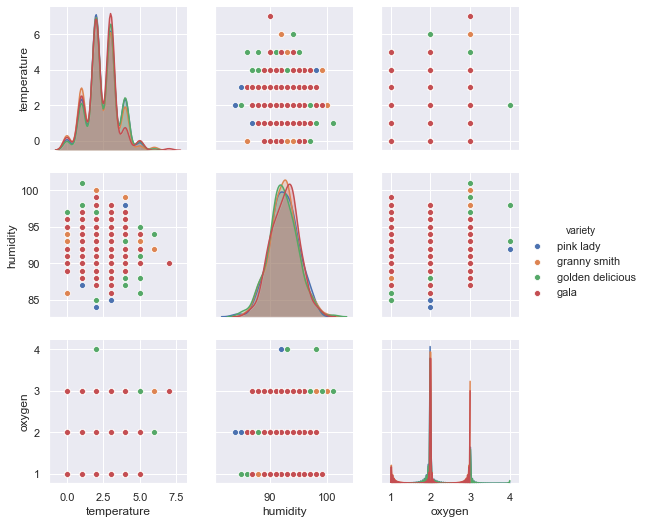

In [6]:
# Generate visuals using seaborn
sns.pairplot(df,hue='variety')

In [7]:
# Adapted from [11] https://datascience.stackexchange.com/questions/39071/create-a-binary-classification-dataset-python-sklearn-datasets-make-classifica
# Find out what varieties met stated criteria. If a samples is not within the defined range, assign 1.  If any are out of the stated limits, assign 0. 
def header(temperature, humidity, oxygen, shelf_life, quality_approved):
# Find out if temperature is outside of the 0 - 5 range
  if temperature < 0 or temperature > 5:
# Return 1 if out of range
    return 1
# Find out if humidity is outside of the 90 to 95 range
  elif humidity < 90 or humidity > 95:
# Return 1 if out of range
    return 1
# Find out if oxygen is outside the range of 1.5 to 2.5
  elif oxygen < 1.5 or oxygen > 2.5:
# Return 1 if out of range
    return 1
# Find out if shelf life is greater than 365 days
  elif shelf_life != '366 + days':
# Return 1 if out of range
    return 1
# Find out if apples failed quality inspection
  elif quality_approved == "pass":
# Return 1 if out of range
    return 1
# Otherwise return 0
  return 0
# Add a variable and call it meet_criteria
df['meet_criteria'] = df.apply(lambda row: header(row['temperature'], 
                                                  row['humidity'],
                                                  row['oxygen'],
                                                  row['shelf_life'],
                                                  row['quality_approved']), axis=1)
# View the dataframe again
df

,temperature,humidity,oxygen,quality_approved,shelf_life,variety,meet_criteria
0,2.0,93.0,3.0,pass,91 - 180 days,pink lady,1
1,2.0,93.0,3.0,pass,0 - 90 days,pink lady,1
2,0.0,91.0,2.0,pass,91 - 180 days,granny smith,1
3,4.0,93.0,2.0,pass,91 - 180 days,granny smith,1
4,1.0,91.0,2.0,pass,91 - 180 days,golden delicious,1
...,...,...,...,...,...,...,...
995,3.0,93.0,2.0,pass,91 - 180 days,pink lady,1
996,3.0,93.0,2.0,pass,181 - 240 days,granny smith,1
997,2.0,95.0,1.0,pass,91 - 180 days,granny smith,1
998,3.0,92.0,1.0,pass,240 - 365 days,golden delicious,1


In [8]:
# Split the data by variety and meet criteria using groupby
df.groupby(['variety', 'meet_criteria']).size()

variety           meet_criteria
gala              0                  2
                  1                228
golden delicious  1                259
granny smith      0                  1
                  1                261
pink lady         1                249
dtype: int64

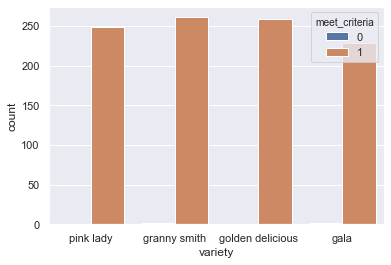

In [9]:
# Create visualisation using Seaborn Countplot, view apples by meet criterial by variety
sns.countplot(x='variety',hue='meet_criteria' ,data=df)

In [10]:
# Gala has most apples that do not meet quality standards - break this down
# Adapted from https://jeffdelaney.me/blog/useful-snippets-in-pandas/
gala = df[(df.variety == 'gala') & (df.meet_criteria == 0)]
gala.groupby(['temperature', 'oxygen', 'humidity', 'quality_approved', 'shelf_life']).size()
#gala.describe()

temperature  oxygen  humidity  quality_approved  shelf_life
1.0          2.0     91.0      fail              366 + days    1
                     95.0      fail              366 + days    1
dtype: int64

Gala apples have the largest amount of apples that failed quality approval.

In [11]:
# Split the groups by variables using groupby
gala.groupby(['temperature', 'humidity', 'oxygen','shelf_life']).size()

temperature  humidity  oxygen  shelf_life
1.0          91.0      2.0     366 + days    1
             95.0      2.0     366 + days    1
dtype: int64

In [12]:
# Adapted from [18] https://stackoverflow.com/questions/49609353/pandas-dataframe-to-csv-not-exporting-all-rows/53606044
# output dataframe to csv file
df.to_csv("sc.csv", index=False, sep=',', mode='w')

## Conclusion

The dataset has been generated using appropriate distributions above using Numpy Random libraries

## References

 - [1] __[Python, 2019](https://www.python.org/)__
 - [2] __[GMIT. Quality assurance framework, 2019](https://www.gmit.ie/general/quality-assurance-framework)__
 - [3] __[Software Freedom Conservancy. Git.](https://git-scm.com/)__
 - [4] __[Project Jupyter](https://jupyter.org/)__
 - [5] __[NumPy developers. Numpy](http://www.numpy.org/)__
 - [6] __[NCBI, 2004](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC442131/)__
 - [7] __[NPR, 2018](https://www.npr.org/sections/thesalt/2018/11/26/668256349/thanks-to-science-you-can-eat-an-apple-every-day?t=1575821675123)__
 - [8] __[BBC, 2017](https://www.bbc.com/future/article/20170503-how-farmers-put-apples-into-suspended-animation)__
 - [9] __[Pynative, 2019](https://pynative.com/python-random-choice/)__
 - [10] __[Scipy, 2018](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html)__
 - [11] __[Datascience.stackexchange, 2018](https://datascience.stackexchange.com/questions/39071/create-a-binary-classification-dataset-python-sklearn-datasets-make-classifica)__
 - [12] __[Researchgate, 2009](https://www.researchgate.net/publication/227520884_Supply_Chain_Strategies_for_Perishable_Products_The_Case_of_Fresh_Produce)__
 - [13] __[EC.europa, 2017](http://ec.europa.eu/environment/life/project/Projects/index.cfm?fuseaction=search.dspPage&n_proj_id=5007&docType=pdf)__
 - [14] __[link.springer, 2018]( https://link.springer.com/article/10.1007/s40092-018-0287-1)__
 - [15] __[The journal, 2017](https://www.thejournal.ie/readme/apples-ireland-love-giy-3595537-Sep2017/)__
 - [16] __[NCAGR]( https://www.ncagr.gov/agscool/commodities/apkid.htm)__
 - [17] __[StackOverflow, 2018](https://stackoverflow.com/questions/49609353/pandas-dataframe-to-csv-not-exporting-all-rows/53606044)__
 - [18] __[Jeff Delaney, 2016](https://jeffdelaney.me/blog/useful-snippets-in-pandas)__